In [1]:
# !pip install folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import folium
import requests
import random
from folium.map import *
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

# print(pd.__version__)
data = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")

data = data[pd.notnull(data.latitude)]
data = data[pd.notnull(data.longitude)]
data.head()

incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...                    participant_age  \
0                        False  ...                              0::20   
1                        False  ...                              0::20   
2                        False  ...  0::25||1::31||2::33||3::34||4::33   
3                        False  ...         0::29||1::33||2::56||3::33   
4                        False  ...         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                    participant_name  \
0                                     0::Julian Sims   
1                                  0::Bernard Gillis   
2  0::Damien Bell||1::Desmen Noble||2::Herman Sea...   
3  0::Stacie Philbrook||1::Christopher Ratliffe||...   
4  0::Danielle Imani Jameison||1::Maurice Eugene ...   

   participant_relationship  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                 3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                  NaN   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                 62.0   
2  http://www.morningjournal.com/ge

In [2]:
from folium.plugins import FastMarkerCluster
map_osm = folium.Map(location=[48, -102], zoom_start=4)
counter = 0
ct= 0 
sam = data.sample(3500)
FastMarkerCluster(data = list(zip(sam['latitude'].values, sam['longitude'].values))).add_to(map_osm)
for index,loc in sam.iterrows():

        if(pd.notnull(loc[14]) and pd.notnull(loc[16])):
            latlong = [loc[14], loc[16]]
        folium.CircleMarker(location=latlong, radius=8, fill_opacity=.5, fill=True).add_to(map_osm)
folium.LayerControl().add_to(map_osm)
    
map_osm

In the following piece of code, we have just worked on tidying and scraping the data required which in this case is 
splitting month into 3 different columns of month year and day so that we can access it more easily. We have further used 
it to acquire the frequency of gun violence crimes over the different years so that we can get an idea about 
whether we have had a yearlly incline or decline.

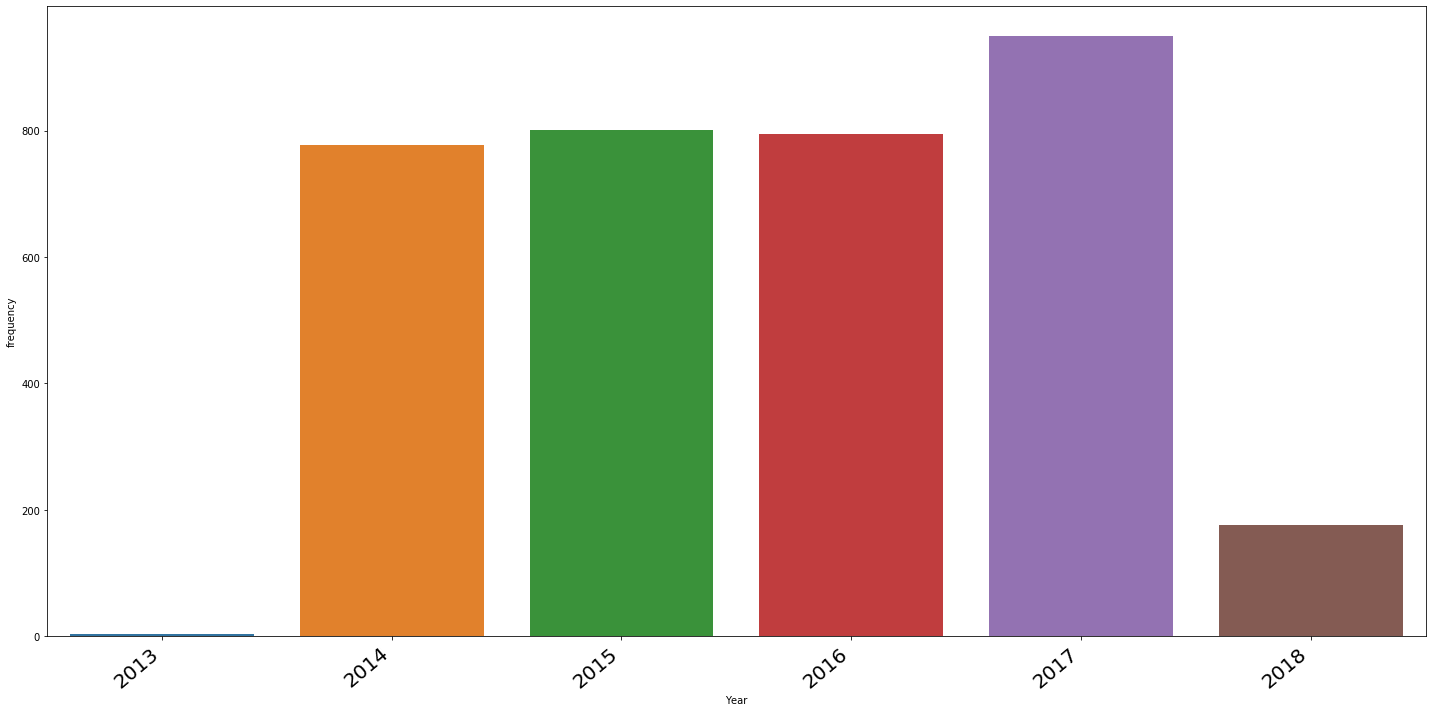

In [3]:
# !pip install seaborn
import collections
import seaborn as sns
year = []
month = []
day = []
q = []
count = 0
uniqueyear = {}
for index,loc in sam.iterrows():
    year.append(int(loc[1].split('-')[0]))
    month.append(int(loc[1].split('-')[1]))
    day.append(int(loc[1].split('-')[2]))
sam['Year'] = year
sam['Month'] = month
sam['Day'] = day

for i in year:
    if i not in q:
        q.append(i)
        uniqueyear[i] = 0
        
for i in year:
    uniqueyear[i] += 1
    
uniqueyear = collections.OrderedDict(sorted(uniqueyear.items()))

f = []
y = []
for i in uniqueyear:
    f.append(uniqueyear[i])
    y.append(i)
p = pd.DataFrame({'Year' : y , 'frequency' : f})
        
plt.figure(figsize = (20, 10))
ax = sns.barplot(x = p['Year'], y = p['frequency'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=20)
plt.tight_layout()
plt.show()



In the following plot graph, we have made an effort to plot the respective number of gun violence cases
against their respective years, I have done this by initially creating a dictionary that maps each year to
the total number of gun violence cases that have happened in that respective year. Eventually i have mapped 
every key and and its values to different lists. Furthermore, I have then created a pandas dataframe that just 
has two columns-Year and frequency. Using the dataframe, I have plotted the columns on the X and Y axis 
using Matplotlib to give us a good idea of how variable gun violence has been over the years between 2013
and 2018.

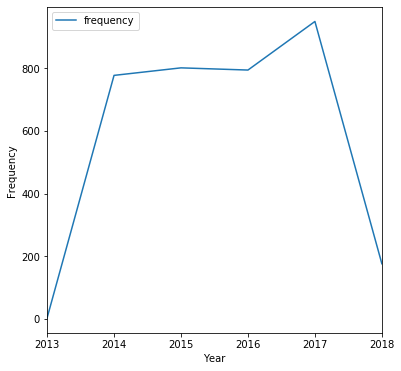

In [4]:
fig, ax = plt.subplots(figsize=(6,6))



p.plot(x = 'Year', y = 'frequency', ax = ax)
plt.ylabel('Frequency')
ax.set_xlim([2013,2018])
plt.show()

In [5]:
from mapboxgl.utils import *
from mapboxgl.viz import *

token = os.getenv('MAPBOX_ACCESS_TOKEN')
print(sam['longitude'])
# Create a geojson Feature Collection export from a Pandas dataframe
points = df_to_geojson(sam, properties = None, lat='latitude', lon='longitude', precision=3)

#Create a heatmap
heatmap_color_stops = create_color_stops([0.01,0.25,0.5,0.75,1], colors='RdPu')
heatmap_radius_stops = [[0,1], [15, 40]] #increase radius with zoom

color_breaks = [0,10,100,1000,10000]
color_stops = create_color_stops(color_breaks, colors='Spectral')

heatmap_weight_stops = create_weight_stops(color_breaks)

#Create a heatmap
viz = HeatmapViz(points,
                 access_token=token,
                 weight_property= None,
                 weight_stops=heatmap_weight_stops,
                 color_stops=heatmap_color_stops,
                 radius_stops=heatmap_radius_stops,
                 opacity=0.9,
                 center=(-95, 40),
                 zoom=3,
                 below_layer='waterway-label')

viz.show()

39297     -80.6203
86327     -81.8437
58836     -87.6169
217623    -77.0278
75000     -79.9386
            ...   
178405   -121.6670
110018    -92.4328
48908     -86.7192
214833    -87.2547
24147     -83.3641
Name: longitude, Length: 3500, dtype: float64


/Users/pradyumnbangera/Desktop/final/env/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


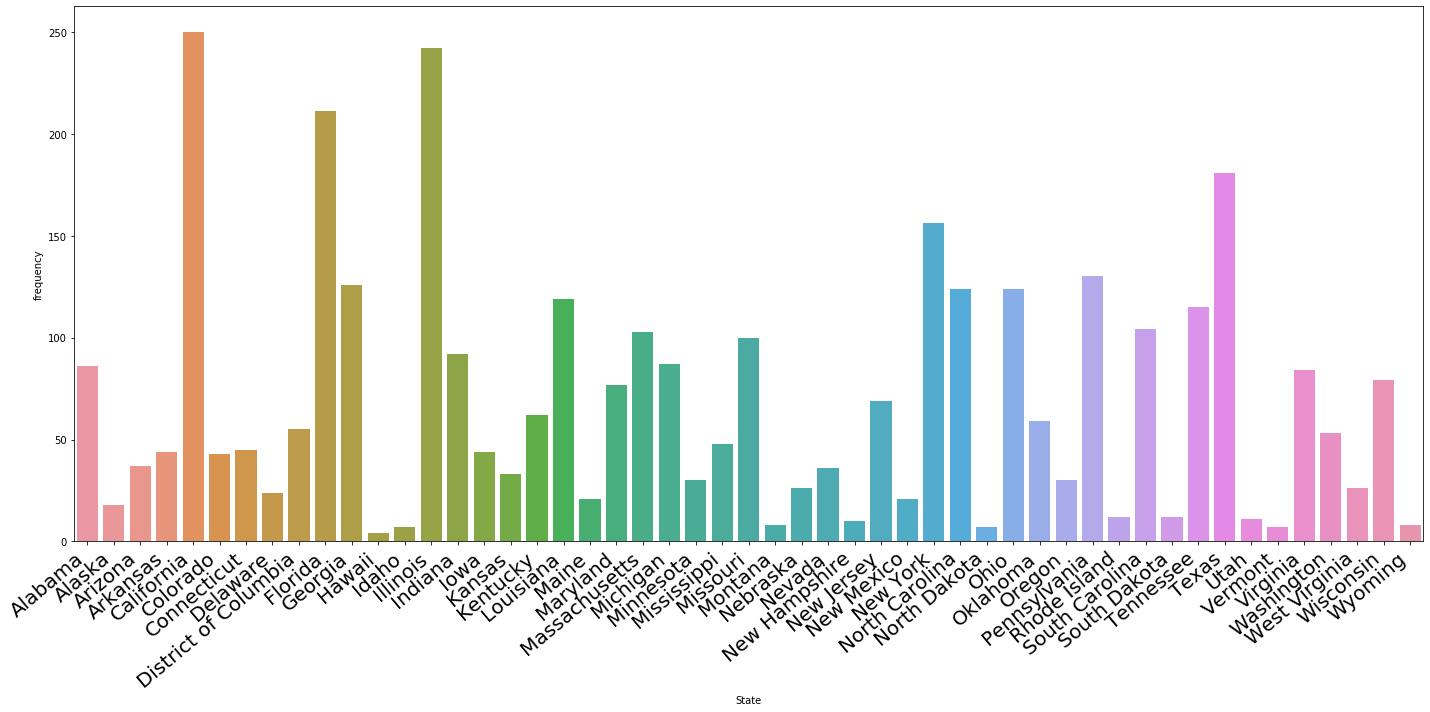

In [6]:
state = []
unst = {}
for i in sam['state']:
    if i not in state:
        state.append(i)
        unst[i] = 0

for i in sam['state']:
    unst[i] += 1
    
unst = collections.OrderedDict(sorted(unst.items()))

s = []
f = []
for i in unst:
    f.append(unst[i])
    s.append(i)
p = pd.DataFrame({'State' : s , 'frequency' : f})

    


plt.figure(figsize = (20, 10))
ax = sns.barplot(x = p['State'], y = p['frequency'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=20)
plt.tight_layout()
plt.show()

In [7]:
fig, ax = plt.subplots(figsize=(16,16))
sam = sam.groupby('Year')
count2013 = {}
count2014 = {}
count2015 = {}
count2016 = {}
count2017 = {}
count2018 = {}
for i, tabs in sam:
    for s in state:
#         print(s)
        for r in tabs.iterrows():
            if s == r[1][2]:
                count2013[s] = 0
                count2014[s] = 0
                count2015[s] = 0
                count2016[s] = 0
                count2017[s] = 0
                count2018[s] = 0
                
for i, tabs in sam:
    if i ==2013:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2013[s] += 1
                
    if i ==2014:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2014[s] += 1
    if i ==2015:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2015[s] += 1
    if i ==2016:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2016[s] += 1
    if i ==2017:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2017[s] += 1
                    
    if i ==2018:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2018[s] += 1
                    
print(count2014)

y = []
stt = []
freq = []



for i in count2013:
    if count2013[i]>0:
        y.append(2013)
        stt.append(i)
        freq.append(count2013[i])
        
for i in count2014:
    if count2014[i]>0:
        y.append(2014)
        stt.append(i)
        freq.append(count2014[i])
    
for i in count2015:
    if count2015[i]>0:
        y.append(2015)
        stt.append(i)
        freq.append(count2015[i])
        
for i in count2016:
    if count2016[i]>0:
        y.append(2016)
        stt.append(i)
        freq.append(count2016[i])
        
        
for i in count2017:
    if count2017[i]>0:
        y.append(2017)
        stt.append(i)
        freq.append(count2017[i])
        
        
for i in count2018:
    if count2014[i]>0:
        y.append(2018)
        stt.append(i)
        freq.append(count2018[i])
        
    
df = pd.DataFrame({'Year':y, 'State':stt,'Frequency':freq})
    

probtwo = df.groupby('State')
for stateName, tabs in probtwo:
    display(tabs.head())
    tabs.plot(x = 'Year', y = 'Frequency', ax = ax)
plt.ylabel('Frequency')
plt.xlabel('Year')
ax.set_xlim([2013,2018])
plt.show()

ValueError: too many values to unpack (expected 2)